In [30]:
import numpy as np
import pandas as pd
import re,nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
airline_tweets = pd.read_csv("/content/Tweets (1).csv")
airline_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<Axes: ylabel='airline'>

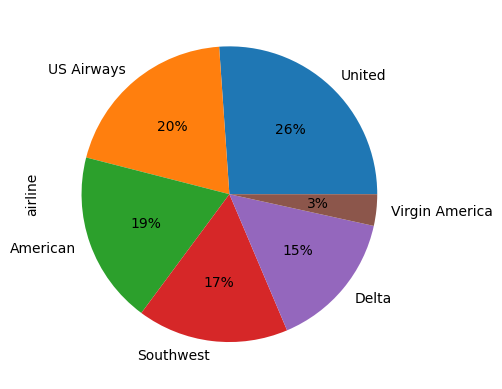

In [4]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')


<Axes: ylabel='airline_sentiment'>

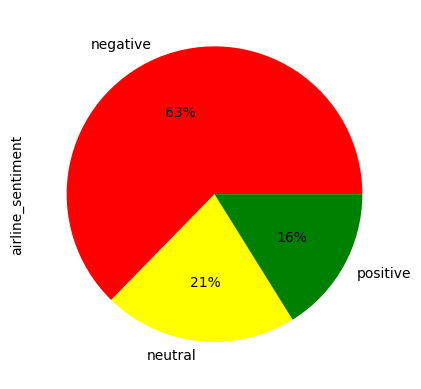

In [5]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


<Axes: xlabel='airline'>

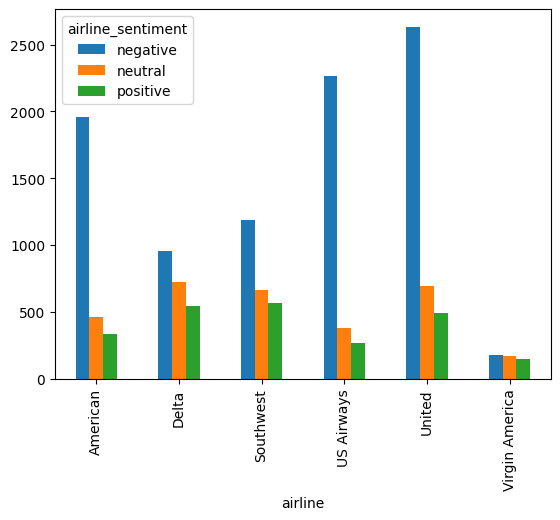

In [6]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

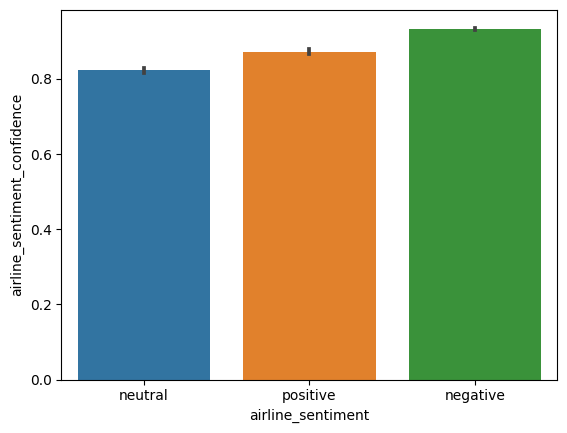

In [7]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)


In [9]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [10]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)


In [15]:
text_classifier = RandomForestClassifier(n_estimators=400, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=0)

In [16]:
predictions = text_classifier.predict(X_test)


In [17]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1727  102   41]
 [ 326  248   40]
 [ 132   59  253]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.61      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7609289617486339


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,max_iter=7000,solver='liblinear')
param_grid = [
    {
    'penalty':['l1','l2'] ,
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]
grid = GridSearchCV(model,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best parameter:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Train set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameter: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.78
Train set score: 0.88
Test set score: 0.79


Train set score: 0.87
Test set score: 0.79
              precision    recall  f1-score   support

    negative       0.84      0.91      0.87      1870
     neutral       0.64      0.54      0.58       614
    positive       0.76      0.66      0.71       444

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



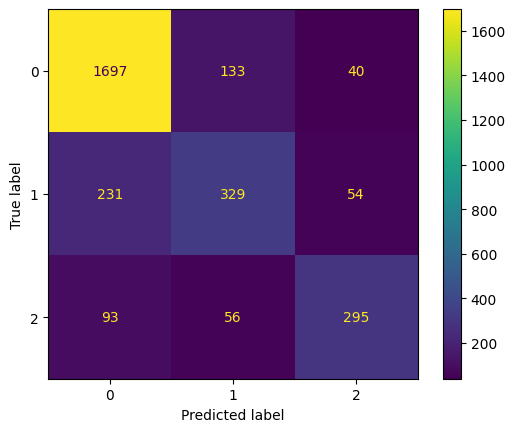

In [27]:

model= LogisticRegression(random_state=42,max_iter=200000,C=5,penalty='l2',solver='liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Train set score: {:.2f}".format(model.score(X_train,y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print(classification_report(y_test, y_pred ))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)
print("Best parameter:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Train set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

In [ ]:
param_grid = {'n_neighbors': range(1, 21, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameter and best score found by grid search
print("Best parameter:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': range(1, 10, 2), 'criterion': ['entropy', 'gini','log_loss']}

clf = DecisionTreeClassifier()

# Perform grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameter and best score found by grid search
print("Best parameter:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

In [34]:
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print("Train set score: {:.2f}".format(bag_clf.score(X_train,y_train)))
print("Test set score: {:.2f}".format(bag_clf.score(X_test, y_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred ))

Test Accuracy:  0.6933060109289617
Train set score: 0.69
Test set score: 0.69
              precision    recall  f1-score   support

    negative       0.70      0.97      0.81      1870
     neutral       0.51      0.11      0.18       614
    positive       0.74      0.34      0.47       444

    accuracy                           0.69      2928
   macro avg       0.65      0.47      0.49      2928
weighted avg       0.67      0.69      0.63      2928



In [ ]:
!pip install category_encoders

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report